# Q* Learning with OpenAI Taxi-v2 🕹️🚕
<br> 
In this Notebook, we'll implement an agent <b>that plays OpenAI Taxi-V2.</b>

<img src="taxi.png" alt="Taxi"/>

The goal of this game is that our agent must <b>pick up the passenger at one location and drop him off to the goal as fast as possible.</b>

There are 4 locations (labeled by different letters) and your job is to pick up the passenger at one location and drop him off in another. 

- You receive +20 points for a successful dropoff
- Lose 1 point for every timestep it takes. 
- There is also a 10 point penalty for illegal pick-up and drop-off actions (if you don't drop the passenger in one of the 3 other locations)

# This is a notebook from [Deep Reinforcement Learning Course with Tensorflow](https://simoninithomas.github.io/Deep_reinforcement_learning_Course/)
<img src="https://raw.githubusercontent.com/simoninithomas/Deep_reinforcement_learning_Course/master/docs/assets/img/DRLC%20Environments.png" alt="Deep Reinforcement Course"/>
<br>
<p>  Deep Reinforcement Learning Course is a free series of articles and videos tutorials 🆕 about Deep Reinforcement Learning, where **we'll learn the main algorithms (Q-learning, Deep Q Nets, Dueling Deep Q Nets, Policy Gradients, A2C, Proximal Policy Gradients…), and how to implement them with Tensorflow.**
<br><br>
    
📜The articles explain the architectures from the big picture to the mathematical details behind them.
<br>
📹 The videos explain how to build the agents with Tensorflow </b></p>
<br>
This course will give you a **solid foundation for understanding and implementing the future state of the art algorithms**. And, you'll build a strong professional portfolio by creating **agents that learn to play awesome environments**: Doom© 👹, Space invaders 👾, Outrun, Sonic the Hedgehog©, Michael Jackson’s Moonwalker, agents that will be able to navigate in 3D environments with DeepMindLab (Quake) and able to walk with Mujoco. 
<br><br>
</p> 

## 📚 The complete [Syllabus HERE](https://simoninithomas.github.io/Deep_reinforcement_learning_Course/)


## Any questions 👨‍💻
<p> If you have any questions, feel free to ask me: </p>
<p> 📧: <a href="mailto:hello@simoninithomas.com">hello@simoninithomas.com</a>  </p>
<p> Github: https://github.com/simoninithomas/Deep_reinforcement_learning_Course </p>
<p> 🌐 : https://simoninithomas.github.io/Deep_reinforcement_learning_Course/ </p>
<p> Twitter: <a href="https://twitter.com/ThomasSimonini">@ThomasSimonini</a> </p>
<p> Don't forget to <b> follow me on <a href="https://twitter.com/ThomasSimonini">twitter</a>, <a href="https://github.com/simoninithomas/Deep_reinforcement_learning_Course">github</a> and <a href="https://medium.com/@thomassimonini">Medium</a> to be alerted of the new articles that I publish </b></p>
    
## How to help  🙌
3 ways:
- **Clap our articles and like our videos a lot**:Clapping in Medium means that you really like our articles. And the more claps we have, the more our article is shared Liking our videos help them to be much more visible to the deep learning community.
- **Share and speak about our articles and videos**: By sharing our articles and videos you help us to spread the word. 
- **Improve our notebooks**: if you found a bug or **a better implementation** you can send a pull request.
<br>

## Important note 🤔
<b> You can run it on your computer but it's better to run it on GPU based services</b>, personally I use Microsoft Azure and their Deep Learning Virtual Machine (they offer 170$)
https://azuremarketplace.microsoft.com/en-us/marketplace/apps/microsoft-ads.dsvm-deep-learning
<br>
⚠️ I don't have any business relations with them. I just loved their excellent customer service.

If you have some troubles to use Microsoft Azure follow the explainations of this excellent article here (without last the part fast.ai): https://medium.com/@manikantayadunanda/setting-up-deeplearning-machine-and-fast-ai-on-azure-a22eb6bd6429

## Prerequisites 🏗️
Before diving on the notebook **you need to understand**:
- The foundations of Reinforcement learning (MC, TD, Rewards hypothesis...) [Article](https://medium.freecodecamp.org/an-introduction-to-reinforcement-learning-4339519de419)
- Q-learning [Article](https://medium.freecodecamp.org/diving-deeper-into-reinforcement-learning-with-q-learning-c18d0db58efe)
- You can follow this notebook using my [video tutorial](https://www.youtube.com/watch?v=q2ZOEFAaaI0) 

In [1]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/q2ZOEFAaaI0?showinfo=0" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')


/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## Step 0: Import the dependencies 📚
First, we need to import the libraries <b>that we'll need to create our agent.</b></br>
We use 3 libraries:
- `Numpy` for our Qtable
- `OpenAI Gym` for our Taxi Environment
- `Random` to generate random numbers

In [2]:
import numpy as np
import gym
import random

## Step 1: Create the environment 🎮
- Here we'll create the Taxi environment. 
- OpenAI Gym is a library <b> composed of many environments that we can use to train our agents.</b>

In [3]:
env = gym.make("CartPole-v0")
env.render()

## Step 2: Create the Q-table and initialize it 🗄️
- Now, we'll create our Q-table, to know how much rows (states) and columns (actions) we need, we need to calculate the action_size and the state_size
- OpenAI Gym provides us a way to do that: `env.action_space.n` and `env.observation_space.n`

In [5]:
action_size = env.action_space.n
print("Action size ", action_size)

state_size = env.observation_space.shape[0]
print("State size ", state_size)

Action size  2
State size  4


In [69]:
_N = 10
qtable = np.zeros((_N,_N,_N,_N, action_size))
# print(qtable)

## Step 3: Create the hyperparameters ⚙️
Here, we'll specify the hyperparameters.

In [70]:
total_episodes = 50000        # Total episodes
total_test_episodes = 100     # Total test episodes
max_steps = 99                # Max steps per episode

learning_rate = 0.7           # Learning rate
gamma = 0.618                 # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.01             # Exponential decay rate for exploration prob

## Step 4: The Q learning algorithm 🧠
- Now we implement the Q learning algorithm:
<img src="qtable_algo.png" alt="Q algo"/>

In [71]:
def s(x):
    return int(_N*np.divide(1, (1. + np.exp(-x))))
s(50)

10

In [72]:
# 2 For life or until learning is stopped
from tqdm import tqdm_notebook
for episode in tqdm_notebook(range(total_episodes)):

    # Reset the environment
    state = env.reset()
    state[0] = s(state[0])
    state[1] = s(state[1])
    state[2] = s(state[2])
    state[3] = s(state[3])
    step = 0
    done = False
    
    for step in range(max_steps):
        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        exp_exp_tradeoff = random.uniform(0,1)
        
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[int(state[0]),int(state[1]),int(state[2]),int(state[3]),:])
        
        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()
        
        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)
        
        new_state[0] = int(s(new_state[0]))
        new_state[1] = int(s(new_state[1]))
        new_state[2] = int(s(new_state[2]))
        new_state[3] = int(s(new_state[3]))
#         print(int(new_state[0]))
        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        qtable[int(state[0]),int(state[1]),int(state[2]),int(state[3]), action] = qtable[int(state[0]),int(state[1]),int(state[2]),int(state[3]), action] + learning_rate * (reward + gamma * 
                                    np.max(qtable[int(new_state[0]),int(new_state[1]),int(new_state[2]),int(new_state[3]), :]) - \
                                            qtable[int(state[0]),int(state[1]),int(state[2]),int(state[3]), action])
                
        # Our new state is state
        state = new_state
        
        # If done : finish episode
        if done == True: 
            break
    
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 

In [73]:
state[2]

4.0

## Step 5: Use our Q-table to play Taxi ! 🚖
- After 50 000 episodes, our Q-table can be used as a "cheatsheet" to play Taxi.
- By running this cell you can see our agent playing Taxi.

In [74]:
env.reset()
rewards = []

for episode in range(total_test_episodes):
    state = env.reset()
    
    state[0] = s(state[0])
    state[1] = s(state[1])
    state[2] = s(state[2])
    state[3] = s(state[3])
    
    step = 0
    done = False
    total_rewards = 0
    #print("****************************************************")
    #print("EPISODE ", episode)

    for step in range(max_steps):
        # UNCOMMENT IT IF YOU WANT TO SEE OUR AGENT PLAYING
        # env.render()
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(qtable[int(state[0]),int(state[1]),int(state[2]),int(state[3]),:])
        
        new_state, reward, done, info = env.step(action)
        
        total_rewards += reward
        
        if done:
            rewards.append(total_rewards)
            #print ("Score", total_rewards)
            break
        state = new_state
env.close()
print ("Score over time: " +  str(sum(rewards)/total_test_episodes))

Score over time: 10.83


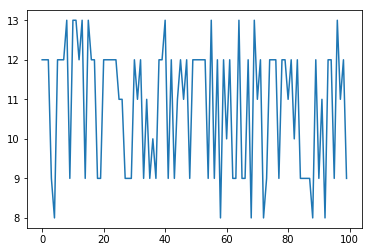

In [75]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(rewards)

In [76]:
np.mean(rewards)

10.83